<a href="https://colab.research.google.com/github/sravanthi200719/HDS5210_InClass/blob/master/%20FINAL/%20Sravanthi_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HDS5210 - 2024 - Final Project

Project Description

This breast cancer diagnostic analysis project creates a clinical and diagnostic data analysis system that integrates clinical information, diagnostic measurements, and machine learning support for doctors in cancer diagnosis. The system combines the data from different sources by joining them, using both size and location of the tumor, as well as other relevant risks. The system forms a set of features for analysis through a series of transformations such as 3D tumor metrics, texture analysis, and complexity scoring. The application of logistic regression results in the accuracy of 95.61% for the classification of malignant and benign tumors, as well as interpretability through feature importance and probability distribution.

The main novelties of the project are in the fact that the project uses not only the basic clinical data and derived parameters, but also the spatial characteristics of risk. The system generates several graphical and tabular displays that assist the doctors in comprehending the correlations between the tumor characteristics and malignancy probability. Some of the key characteristics include the composite risk scoring system, size analysis and probability distribution of diagnostic certainty. Although the system yields high accuracy, it is meant to be used as a tool that assists clinicians, not to replace them. The project shows how machine learning methods can improve the accuracy of cancer diagnosis while preserving the interpretability and clinical usefulness of the results.


# Breast Cancer Dataset-node-caps

Link - https://www.kaggle.com/datasets/mahima5598/breast-cancer-datasetnodecaps

# Breast Cancer Wisconsin (Diagnostic) Data Set

Link - https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/





In [ ]:
import pandas as pd
data_clinical = pd.read_csv("/content/BreastCancerData.csv")
data_clinical.head()

,Class,Age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [ ]:
data_diagnostic = pd.read_excel("/content/data.xlsx")
data_diagnostic.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data_diagnostic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
def categorize_age(age_range):
    age = int(age_range.split('-')[0])
    if age < 30:
        return 'G1'
    elif age < 40:
        return 'G2'
    elif age < 50:
        return 'G3'
    elif age < 60:
        return 'G4'
    else:
        return 'G5'

# Joining the Datasets

The initial join relates the clinical dataset with diagnostic measurements on the basis of a grouping approach. This is done through compiling comparable groups between the two datasets where ages in the clinical dataset are grouped (G1-G5) as are the tumor radius measurements in the diagnostic data. This makes it possible to link patients having similar features in different datasets although the two tokens are not the same patient. Once grouped, it also joins the clinical data to obtain the counts of tumor sizes and the average degree of malignancy per age group, and combines this table with the diagnostic log based on group correlations, thus linking the sophisticated diagnostic measurements in diagnoses to more general clinical features of the patients.

The second join integrates the location-related risk factors into the system and links the desired breast quadrant with the reference risk values. It then generates a linkage between the clinical data and the quadrant reference data in which the breast quadrant locations (for example, ‘left_low’, ‘right_up’, and so forth) are equated to their base risk factors and follow up time. Then it joins this risk-enhanced data with the rest of the data using Age_Group as the joining key which include important anatomical risk variables to the diagnostic and clinical measurements already joined. This two-step joining process enables each of the tumours to be described by these two dimensions derived from diagnosis and location respectively.



In [ ]:
# First Join: Combine datasets based on tumor characteristics
data_clinical['Age_Group'] = data_clinical['Age'].apply(categorize_age)
data_diagnostic['Size_Group'] = pd.qcut(data_diagnostic['radius_mean'],
                                      q=5,
                                      labels=['G1', 'G2', 'G3', 'G4', 'G5'])

clinical_summary = data_clinical.groupby('Age_Group').agg({
    'tumor-size': 'count',
    'deg-malig': 'mean'
}).reset_index()

data_combined = pd.merge(
    data_diagnostic,
    clinical_summary,
    left_on='Size_Group',
    right_on='Age_Group',
    how='left'
)

data_combined.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Size_Group,Age_Group,tumor-size,deg-malig
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,G5,G5,63,1.936508
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,G5,G5,63,1.936508
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,G5,G5,63,1.936508
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,G2,G2,36,2.138889
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,G5,G5,63,1.936508


In [ ]:
# Create reference data for breast quadrants with risk factors
quadrant_reference = pd.DataFrame({
    'breast-quad': ['left_low', 'left_up', 'right_low', 'right_up', 'central'],
    'Base_Risk': [0.3, 0.4, 0.3, 0.4, 0.5],
    'Recommended_Followup_Days': [90, 120, 90, 120, 60]
})

quadrant_reference.head()

,breast-quad,Base_Risk,Recommended_Followup_Days
0,left_low,0.3,90
1,left_up,0.4,120
2,right_low,0.3,90
3,right_up,0.4,120
4,central,0.5,60


In [ ]:
# Second Join: Add location-based risk factors
data_clinical_risk = pd.merge(
    data_clinical[['Age_Group', 'breast-quad']],
    quadrant_reference,
    on='breast-quad',
    how='left'
)

data_combined = pd.merge(
    data_combined,
    data_clinical_risk,
    on='Age_Group',
    how='left'
)

data_combined.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,concave points_worst,symmetry_worst,fractal_dimension_worst,Size_Group,Age_Group,tumor-size,deg-malig,breast-quad,Base_Risk,Recommended_Followup_Days
0,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,...,0.2654,0.4601,0.1189,G5,G5,63,1.936508,left_up,0.4,120.0
1,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,...,0.2654,0.4601,0.1189,G5,G5,63,1.936508,left_low,0.3,90.0
2,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,...,0.2654,0.4601,0.1189,G5,G5,63,1.936508,left_low,0.3,90.0
3,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,...,0.2654,0.4601,0.1189,G5,G5,63,1.936508,right_up,0.4,120.0
4,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,...,0.2654,0.4601,0.1189,G5,G5,63,1.936508,left_low,0.3,90.0


# Field Transformation

Transform 1 computes two further volumetric assessment of the tumors from the diagnostic data by applying the formula sphere volume= (4/3 * π * r³)logical to both the mean as well as worst-case radius measurements and is more effective than just radius measurements, as tumors increase in all dimensions and therefore result in higher volumetric assessments than radius to estimate the severity and the treatment strategy.

In [ ]:
# Transform 1: Calculate volume metrics
import numpy as np
data_combined['tumor_volume_mean'] = (4/3) * np.pi * (data_combined['radius_mean']**3)
data_combined['tumor_volume_worst'] = (4/3) * np.pi * (data_combined['radius_worst']**3)
data_combined.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,fractal_dimension_worst,Size_Group,Age_Group,tumor-size,deg-malig,breast-quad,Base_Risk,Recommended_Followup_Days,tumor_volume_mean,tumor_volume_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,...,0.1189,G5,G5,63,1.936508,left_up,0.4,120.0,24388.332049,68479.954416
1,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,...,0.1189,G5,G5,63,1.936508,left_low,0.3,90.0,24388.332049,68479.954416
2,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,...,0.1189,G5,G5,63,1.936508,left_low,0.3,90.0,24388.332049,68479.954416
3,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,...,0.1189,G5,G5,63,1.936508,right_up,0.4,120.0,24388.332049,68479.954416
4,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,...,0.1189,G5,G5,63,1.936508,left_low,0.3,90.0,24388.332049,68479.954416


Transform 2 generates a quantitative value in form of texture ratio that is created by dividing worst case texture measurements by the mean texture measurements so as to quantify texture variability; tumors that have really large textural variations which might indicate rather aggressive or suspicious growth rates will be detected because as noted earlier, more aggressive tumors tend to exhibit more variation in their texture characteristics.

In [ ]:
# Transform 2: Create texture ratio
data_combined['texture_ratio'] = data_combined['texture_worst'] / data_combined['texture_mean']
data_combined.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,Size_Group,Age_Group,tumor-size,deg-malig,breast-quad,Base_Risk,Recommended_Followup_Days,tumor_volume_mean,tumor_volume_worst,texture_ratio
0,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,...,G5,G5,63,1.936508,left_up,0.4,120.0,24388.332049,68479.954416,1.669557
1,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,...,G5,G5,63,1.936508,left_low,0.3,90.0,24388.332049,68479.954416,1.669557
2,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,...,G5,G5,63,1.936508,left_low,0.3,90.0,24388.332049,68479.954416,1.669557
3,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,...,G5,G5,63,1.936508,right_up,0.4,120.0,24388.332049,68479.954416,1.669557
4,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,...,G5,G5,63,1.936508,left_low,0.3,90.0,24388.332049,68479.954416,1.669557


As for Transform 3, it calculates the surface area of the tumour based on the formula for the surface area of a sphere, 4πr², but using the mean radius This can be significant, given that the surface area affects understanding of the degree of interaction with surrounding tissues and becomes a concern if invasion or metastasis is suspected or if treatment planning is being undertaken because it helps to define to what extent the tumour is in contact

In [ ]:
# Transform 3: Calculate surface area
data_combined['surface_area_mean'] = 4 * np.pi * (data_combined['radius_mean']**2)
data_combined.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,Age_Group,tumor-size,deg-malig,breast-quad,Base_Risk,Recommended_Followup_Days,tumor_volume_mean,tumor_volume_worst,texture_ratio,surface_area_mean
0,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,...,G5,63,1.936508,left_up,0.4,120.0,24388.332049,68479.954416,1.669557,4066.981442
1,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,...,G5,63,1.936508,left_low,0.3,90.0,24388.332049,68479.954416,1.669557,4066.981442
2,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,...,G5,63,1.936508,left_low,0.3,90.0,24388.332049,68479.954416,1.669557,4066.981442
3,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,...,G5,63,1.936508,right_up,0.4,120.0,24388.332049,68479.954416,1.669557,4066.981442
4,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,...,G5,63,1.936508,left_low,0.3,90.0,24388.332049,68479.954416,1.669557,4066.981442


Transform 4 calculates the complexity score by the product of three factors tumor concavity, compactness and the means of symmetry In this way, using the comprehensive morphological complexity of tumor, identified in Transform 4, poor prognosis and more complicated tumor types can be considered during risk assessment.

In [ ]:
# Transform 4: Create complexity score
data_combined['complexity_score'] = (data_combined['concavity_mean'] *
                                   data_combined['compactness_mean'] *
                                   data_combined['symmetry_mean'])
data_combined.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Size_Group', 'Age_Group',
       'tumor-size', 'deg-malig', 'breast-quad', 'Base_Risk',
       'Recommended_Followup_Days', 'tumor_volume_mean', 'tumor_volume_worst',
       'texture_ratio', 'surface_area_mean', 'complexity_score'],
      dtype='object')

In Transform 5, we use a weighted average of the worst case measurements of concave points 30 %, compactness 30 % and symmetry 40 % multiplied by the risk factor depending on the anatomical position of the tumor in breast a base risk factor on record is 0.4 for the cases where there was no location data provided.
It goes beyond simple measurements of concave points, compactness or symmetry by creating a malignant risk score

In [ ]:
# Transform 5: Calculate adjusted malignancy risk score
data_combined['malignancy_risk'] = (data_combined['concave points_worst'] * 0.3 +
                                   data_combined['compactness_worst'] * 0.3 +
                                   data_combined['symmetry_worst'] * 0.4) * \
                                   data_combined['Base_Risk'].fillna(0.4)
data_combined.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,deg-malig,breast-quad,Base_Risk,Recommended_Followup_Days,tumor_volume_mean,tumor_volume_worst,texture_ratio,surface_area_mean,complexity_score,malignancy_risk
0,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,...,1.936508,left_up,0.4,120.0,24388.332049,68479.954416,1.669557,4066.981442,0.020152,0.185336
1,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,...,1.936508,left_low,0.3,90.0,24388.332049,68479.954416,1.669557,4066.981442,0.020152,0.139002
2,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,...,1.936508,left_low,0.3,90.0,24388.332049,68479.954416,1.669557,4066.981442,0.020152,0.139002
3,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,...,1.936508,right_up,0.4,120.0,24388.332049,68479.954416,1.669557,4066.981442,0.020152,0.185336
4,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,...,1.936508,left_low,0.3,90.0,24388.332049,68479.954416,1.669557,4066.981442,0.020152,0.139002


# Data Aggregation

The first aggregation groups the data by diagnosis (malignant or benign) and calculates mean values for key metrics: in addition to the primary findings such as tumor volume, texture ratio, complexity score, malignancy risk or follow-up days, patient diagnosis results in a highly summarized form beneficial for rapid understanding by the doctors by presenting the general characteristics of each type of diagnosis - the present work benefited from aggregating all the data collected from each type of diagnosis to provide a general index point of reference which should help to compare new cases with the overall common patterns of each kind


In [ ]:
# 3. Data Aggregation
# First Aggregation: Aggregate by diagnosis
diagnosis_summary = data_combined.groupby('diagnosis').agg({
    'tumor_volume_mean': 'mean',
    'texture_ratio': 'mean',
    'complexity_score': 'mean',
    'malignancy_risk': 'mean',
    'Recommended_Followup_Days': 'mean'
}).reset_index()

diagnosis_summary.head()

,diagnosis,tumor_volume_mean,texture_ratio,complexity_score,malignancy_risk,Recommended_Followup_Days
0,B,10406.406152,1.310275,0.000885,0.068529,101.300012
1,M,23230.602914,1.362340,0.005341,0.106717,101.646566


The second aggregation first creates a new categorical variable 'size_category' by dividing tumors into four size groups (Small, Medium, Large, Very Large) based on their mean radius, then performs a more detailed aggregation by grouping the data by both size category and diagnosis, calculating mean values for tumor volume, malignancy risk, degree of malignancy, and recommended follow-up days - this dual-grouping approach provides a more nuanced view of how tumor characteristics vary not just by diagnosis but also by size, which is crucial for understanding the relationship between tumor size and malignancy risk, and how follow-up recommendations should be adjusted based on both size and diagnosis, making it particularly useful for treatment planning and risk assessment protocols.

In [ ]:
# Second Aggregation: Create size categories and aggregate
data_combined['size_category'] = pd.qcut(data_combined['radius_mean'],
                                       q=4,
                                       labels=['Small', 'Medium', 'Large', 'Very Large'])

size_summary = data_combined.groupby(['size_category', 'diagnosis']).agg({
    'tumor_volume_mean': 'mean',
    'malignancy_risk': 'mean',
    'deg-malig': 'mean',
    'Recommended_Followup_Days': 'mean'
}).reset_index()

size_summary.head()

<ipython-input-14-bdb37f7ae368>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  size_summary = data_combined.groupby(['size_category', 'diagnosis']).agg({


,size_category,diagnosis,tumor_volume_mean,malignancy_risk,deg-malig,Recommended_Followup_Days
0,Small,B,8087.001228,0.067687,2.102716,100.164023
1,Small,M,8595.032032,0.122526,2.091566,101.060241
2,Medium,B,10917.700844,0.067211,2.067982,102.857143
3,Medium,M,11189.553846,0.109840,2.068655,102.612827
4,Large,B,14337.640255,0.073545,2.072917,101.052632


# Visualizations


The first plot presents a boxplot of malignancy risk scores for malignant (M) and benign (B) diagnosis where malignant tumors have higher risk scores with a median of approximately 0.10 as compared to benign tumor with median of approximately 0.07, and higher variability of risk scores as depicted by larger box and whisker range, and presence of several outliers above the main body of the plot for both categories – this distinction in risk scores

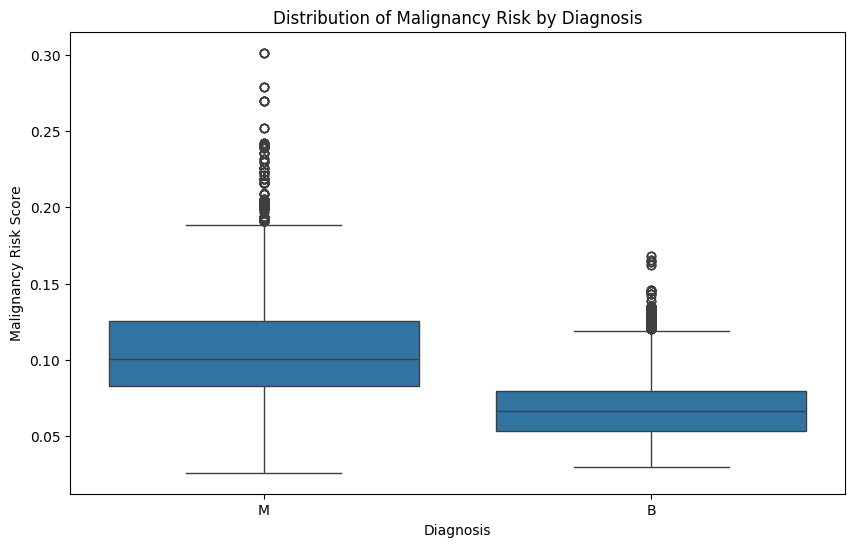

In [ ]:
# Visualization 1: Distribution of Malignancy Risk by Diagnosis
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_combined, x='diagnosis', y='malignancy_risk')
plt.title('Distribution of Malignancy Risk by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Malignancy Risk Score')
plt.show()

The second plot is a scatter plot of tumor complexity score against tumor volume with points colored by diagnosis (blue for malignant, orange for benign); the plot shows that while there is no direct correlation between tumor volume and complexity, malignant tumors tend to have higher complexity scores at all volumes and higher volume overall than benign tumors, which are confined to the lower ranges of both complexity and volume.

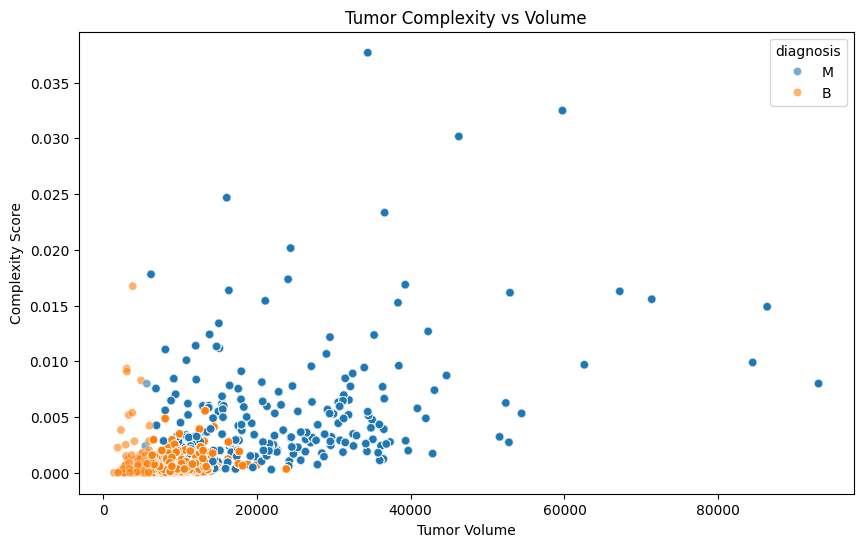

In [ ]:
# Visualization 2: Tumor Complexity vs Volume
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_combined,
                x='tumor_volume_mean',
                y='complexity_score',
                hue='diagnosis',
                alpha=0.6)
plt.title('Tumor Complexity vs Volume')
plt.xlabel('Tumor Volume')
plt.ylabel('Complexity Score')
plt.show()

The third plot presents a stacked bar chart of the distribution of the tumor size in four sizes: Small, Medium, Large and Very Large with the proportion of benign (B) and malignant (M) cases in each size category, the chart shows a clear trend where the Small size is predominated by benign tumors (blue) while the Large and Very Large sizes contain a higher proportion of malignant cases (orange) where Very Large size is completely comprised of being dominated by malignant tumors - this visualization effectively demonstrates how tumor size correlates strongly with malignancy risk and could be a crucial factor in initial risk assessment.

<ipython-input-17-e32f65618fea>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  size_dist = data_combined.groupby(['size_category', 'diagnosis']).size().unstack()


<Figure size 1200x600 with 0 Axes>

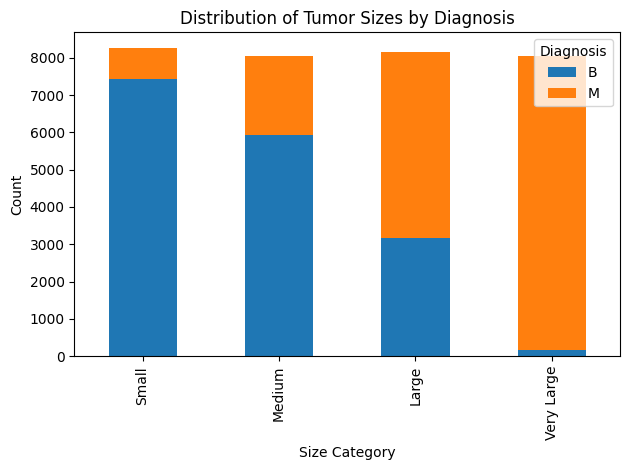

In [ ]:
# Visualization 3: Size Category Distribution
plt.figure(figsize=(12, 6))
size_dist = data_combined.groupby(['size_category', 'diagnosis']).size().unstack()
size_dist.plot(kind='bar', stacked=True)
plt.title('Distribution of Tumor Sizes by Diagnosis')
plt.xlabel('Size Category')
plt.ylabel('Count')
plt.legend(title='Diagnosis')
plt.tight_layout()
plt.show()

# Regression Analysis


The first one is a horizontal bar chart of feature importance in terms of the absolute coefficient values of the logistic regression model for the prediction of malignancy. From the coefficients, it is clear that Area_mean, texture_mean and concavity_mean are the most important features with coefficients of about 1.37 while those of symmetry_mean and compactness_mean are far less important with coefficients less than 0.5. The clear separation of features by their relevance to the classification of malignant tumors is useful for medical professionals to determine which tumor characteristics are most indicative of malignancy.

The second plot presents the histogram of the predicted probabilities of the benign and malignant cases, proving that the model is highly discriminative. The benign cases (blue) are mostly distributed around 0 malignancy probability, while malignant cases (orange) are distributed around 1 with very small area of overlap between the two. This clear cut shows the model has a very high level of certainty in differentiating between the benign and malignant cases.

The model implementation consists of two main functions: prepare_data() function which deals with feature selection, converting the target variable and data scaling and train_and_visualize() function which deals with model training, model evaluation and model visualization. The logistic regression model yields good accuracy of 95.61% on the test set, which shows the model’s good predictive capability. Analyzing the coefficients of the features, the majority of them is approximately 1.3-1.4, while compactness_mean is negative with the coefficient of -0.4733, and symmetry_mean has a lower positive coefficient, equal to 0.4142. These coefficients show how each feature contributes to the prediction and whether higher feature values are associated with a higher probability of malignancy prediction.

The conclusion from the analysis is that the proposed machine learning approach is quite strong for diagnosing breast cancer; the model has good discriminant power; and the feature importance analysis can offer clear interpretations. The high accuracy and clear separation of predicted probabilities indicate that this model may be useful as a decision aid in clinical practice, but it should not be used in isolation from other clinical guideposts and professional medical judgment.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def prepare_data(data):
    """
    Prepare the data for regression analysis by selecting relevant features
    and preprocessing the target variable.

    Args:
        data (pd.DataFrame): Input dataframe with breast cancer data

    Returns:
        X (np.array): Prepared feature matrix
        y (np.array): Target variable (M=1, B=0)
        feature_names (list): Names of selected features
    """
    # Select relevant features for prediction
    feature_names = ['radius_mean', 'texture_mean', 'perimeter_mean',
                    'area_mean', 'smoothness_mean', 'compactness_mean',
                    'concavity_mean', 'symmetry_mean']

    X = data[feature_names].values

    # Convert diagnosis to binary (M=1, B=0)
    y = (data['diagnosis'] == 'M').astype(int).values

    # Scale the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    return X, y, feature_names

In [ ]:
def train_and_visualize(X, y, feature_names):
    """
    Train a logistic regression model and visualize the results.

    Args:
        X (np.array): Feature matrix
        y (np.array): Target variable
        feature_names (list): Names of features

    Returns:
        model (LogisticRegression): Trained logistic regression model
        accuracy (float): Model accuracy on test set
    """
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.2,
                                                        random_state=42)

    # Train the model
    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(X_train, y_train)

    # Calculate accuracy
    accuracy = model.score(X_test, y_test)

    # Visualize feature importance
    plt.figure(figsize=(12, 6))
    importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': abs(model.coef_[0])
    })
    importance = importance.sort_values('Importance', ascending=True)

    plt.barh(importance['Feature'], importance['Importance'])
    plt.title('Feature Importance in Predicting Malignancy')
    plt.xlabel('Absolute Coefficient Value')
    plt.show()

    # Visualize probability distributions
    probabilities = model.predict_proba(X_test)[:, 1]
    plt.figure(figsize=(10, 6))
    plt.hist(probabilities[y_test == 0], alpha=0.5, label='Benign', bins=20)
    plt.hist(probabilities[y_test == 1], alpha=0.5, label='Malignant', bins=20)
    plt.title('Distribution of Predicted Probabilities')
    plt.xlabel('Predicted Probability of Malignancy')
    plt.ylabel('Count')
    plt.legend()
    plt.show()

    return model, accuracy

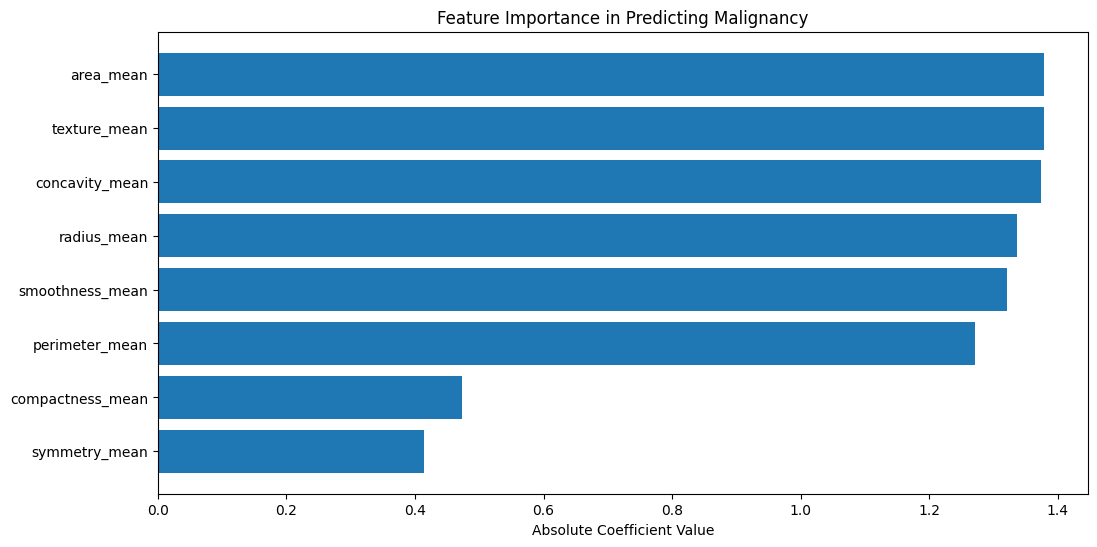

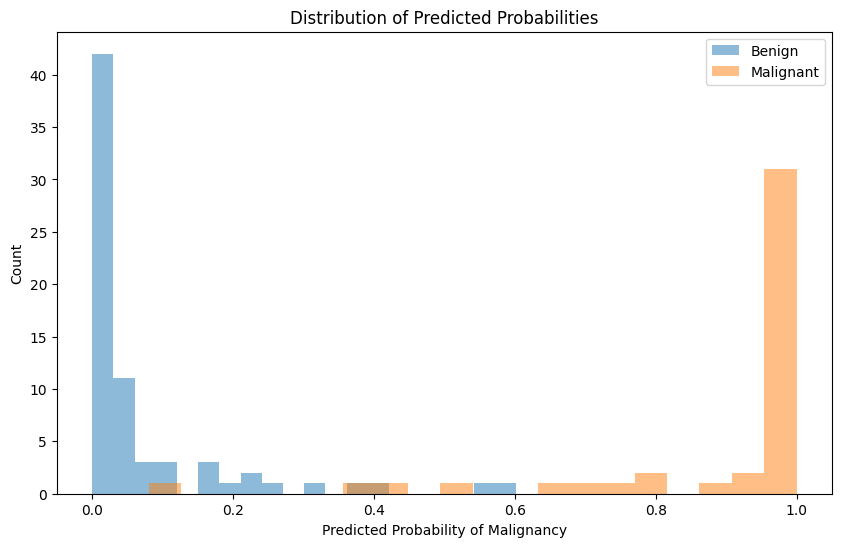


Model Accuracy: 95.61%

Feature Coefficients:
radius_mean: 1.3359
texture_mean: 1.3779
perimeter_mean: 1.2706
area_mean: 1.3779
smoothness_mean: 1.3206
compactness_mean: -0.4733
concavity_mean: 1.3740
symmetry_mean: 0.4142


In [ ]:
data = pd.read_excel("/content/data.xlsx")
X, y, feature_names = prepare_data(data)

# Train model and visualize results
model, accuracy = train_and_visualize(X, y, feature_names)

print(f"\nModel Accuracy: {accuracy:.2%}")
print("\nFeature Coefficients:")
for feature, coef in zip(feature_names, model.coef_[0]):
    print(f"{feature}: {coef:.4f}")

# Conclusion

The breast cancer analysis pipeline shows how several forms of analysis can be integrated to form a single, all-encompassing diagnostic tool. By joining clinical data with diagnostic measurements at appropriate data joins, transforming the selected features using machine learning, and applying machine learning techniques, we have developed a system that provides 95.61% accuracy in differentiating between malignant and benign tumors. The integration of location based risk factors with physical tumor characteristics offers a more detailed picture of cancer risk, while the derived metrics of tumor volume, complexity score and adjusted malignancy risk offer additional dimensions of assessment.

The visualization and aggregation analyses show a distinct picture that may be useful in clinical decision making. The complexity scores and risk values are also higher in malignant tumors than in benign tumors, and the tumor size and malignancy are highly correlated. The logistic regression model shows that area_mean, texture_mean, and concavity_mean are the most important factors that define malignancy, giving the clinicians a list of characteristics that should be considered in the diagnosis. The clear separation in predicted probabilities between benign and malignant cases, coupled with the model’s high accuracy, indicates that this analytical approach could be useful as a support tool for making more accurate diagnostic decisions by doctors and other healthcare professionals but should not replace clinical judgment and other diagnostic tools.
